# Introduction and First Look
---

This report will apply several Machine Learning techniques to a bank-like dataset found on Kaggle [here](https://www.kaggle.com/datasets/zeesolver/credit-card). We'll begin by quickly examining our data, followed by EDA (Exploratory Data Analysis). We'll then prepare our data ready to be used in the main section: Machine Learning. Finally, we'll choose our best model and see how it compares to some estimated real-world data.

It should be said that obviously a bank wouldn't release their data into the public domain. This dataset is synthetic and is to be used to practice and showcase Machine Learning techniques.

Let's start by importing some of the necessary packages and have a quick view of the basic details of our dataset.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os


#Changing the working directory.
os.chdir('/Users/danielanderson/Documents/Portfolio/Fraud_Detection')

In [2]:
#Reading in the data.
df = pd.read_csv('creditcard_2023.csv')

#Quick view of the tabular data.
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


^

Looks like all the features are numeric.

Let's have an overview of the shape, whether there's any NULL values and importantly, the distribution of the 'Fraud' (1) and 'Non-Fraud' (0) classes in the 'Class' column.

In [3]:
#Printing the shape.
print('Shape of the df:\n', df.shape, '\n')

#The .info() method shows lots of good information, NULL values included.
print(df.info(), '\n')

#Checking the split of fraud to non-fraud.
print('Split of classes in df: \n', df['Class'].value_counts())

Shape of the df:
 (568630, 31) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 

^

Looks like there's over half a million total instances.

There's no NULL values, which is helpful.

But, the distribution of fraud to non-fraud is 50/50, which I believe to be unlikely.
It seems obvious that most credit/debit card purchases are NOT fraud. So, we'll have to split the data to end up
with a more realistic percentage later.

# Step 1: Exploratory Data Analysis
---
Before we make any changes to the data ready for modeling, let's have a look at the raw data itself.

In [4]:
#Printing out the max and min values for each column. 
min_vals = []
max_vals = []
for col in df:
    min_vals.append(min(df[col]))
    max_vals.append(max(df[col]))
    print(f'Col {col} min value is: {min(df[col])}, max value is: {max(df[col])}.')

Col id min value is: 0, max value is: 568629.
Col V1 min value is: -3.495583516386668, max value is: 2.22904613004356.
Col V2 min value is: -49.96657153869079, max value is: 4.361865196721416.
Col V3 min value is: -3.1837603416948093, max value is: 14.125833911866232.
Col V4 min value is: -4.951222429093022, max value is: 3.201535546069201.
Col V5 min value is: -9.952785617741023, max value is: 42.716890639914205.
Col V6 min value is: -21.11110792759147, max value is: 26.168402294404643.
Col V7 min value is: -4.351839315074907, max value is: 217.873038474627.
Col V8 min value is: -10.75634230545734, max value is: 5.958040147327273.
Col V9 min value is: -3.751918738076145, max value is: 20.270062075837107.
Col V10 min value is: -3.163275761885778, max value is: 31.72270910795672.
Col V11 min value is: -5.954723293982779, max value is: 2.5135727491214537.
Col V12 min value is: -2.020399318328518, max value is: 17.913556111364983.
Col V13 min value is: -5.955226700040189, max value is: 7.

^

These maximums and minimums don't seem out of the ordinary from this simple view. So let's create a boxplot of the features. (Excluding 'Amount', 'id' and 'Class').

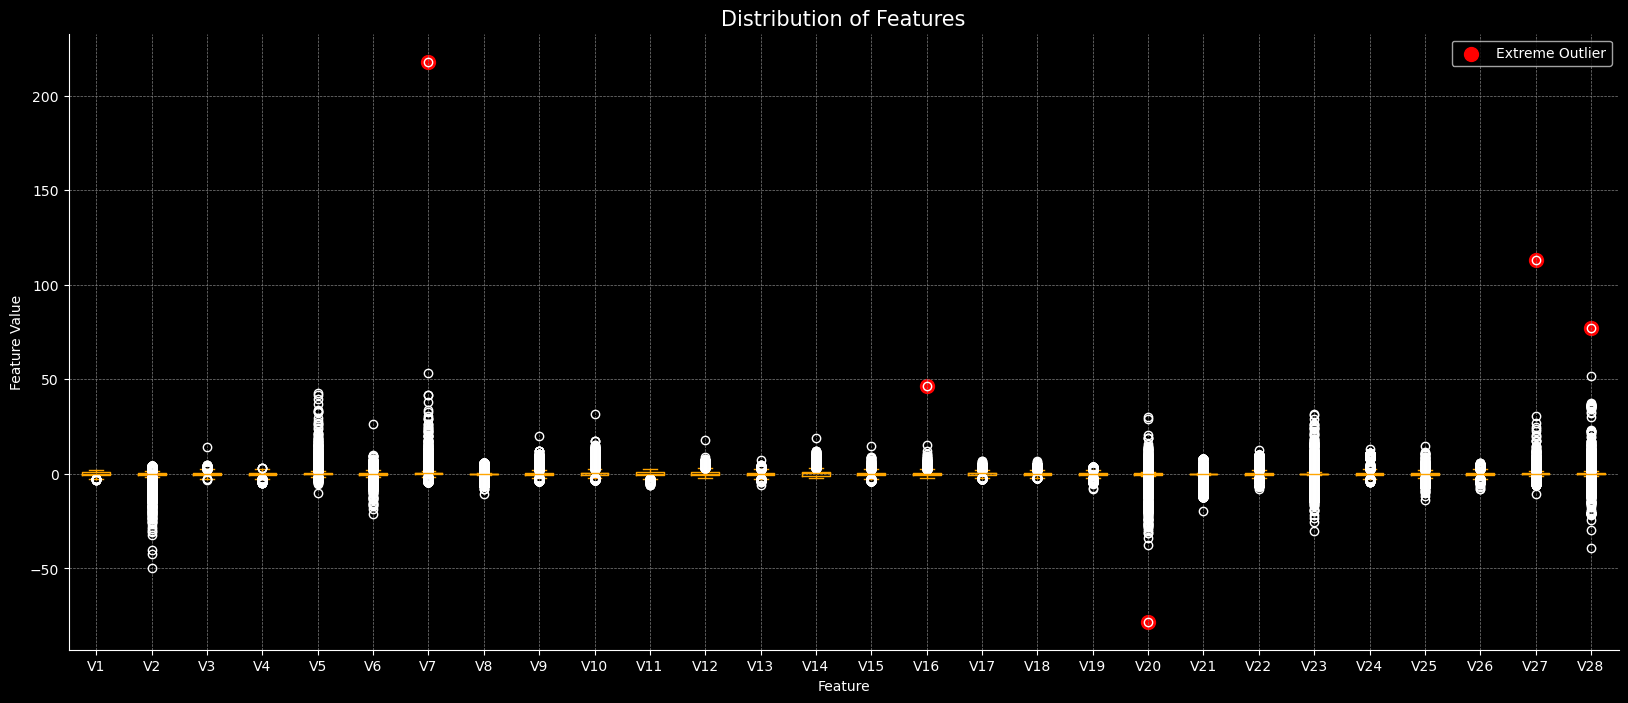

In [5]:
#Setting the style to keep plots looking similar.
plt.style.use('dark_background')

#Large figure size so we can see all of the features in one plot. 
plt.figure(figsize = (20,8))
df.boxplot(column = df.columns.tolist()[1:-2], color= 'orange')

#Highlighting extreme outliers
max_val_1 = df['V7'].max()
plt.scatter(7, max_val_1, color='red', marker='o', s=100, label='Extreme Outlier')
max_val_2 = df['V16'].max()
plt.scatter(16, max_val_2, color='red', marker='o', s=100)
max_val_3 = df['V20'].min()
plt.scatter(20, max_val_3, color='red', marker='o', s=100)
max_val_4 = df['V27'].max()
plt.scatter(27, max_val_4, color='red', marker='o', s=100)
max_val_5 = df['V28'].max()
plt.scatter(28, max_val_5, color='red', marker='o', s=100)

#Let's get rid of the needless top and right boarders and make the gridlines less imposing.
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.legend()
plt.title('Distribution of Features', size = 15)
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.show()

^

There's some pretty large outliers (highlighted in red) in this dataset - at this scale we can't even see the 'box' portion of the boxplot. Since the documentation doesn't actually provide information on what these features represent (it's a synthetic dataset),
we'll have to use some artistic license and presume these 28 features (29 if you include the 'Amount') are numeric properties that a bank might track: like time series data, usage history or some other user-tracking quantity. 

Given there's over 500,000 transaction instances, getting rid of these 5 **extreme** outliers shouldn't make a difference. When we start to edit the data in the Feature Engineering section of this notebook, we might decide to get rid of more than just these five outliers.

So now we know we want to get rid of some outliers, let's have a look at the 'Amount' column, which refers to the monetary value of our fictitious transactions. 

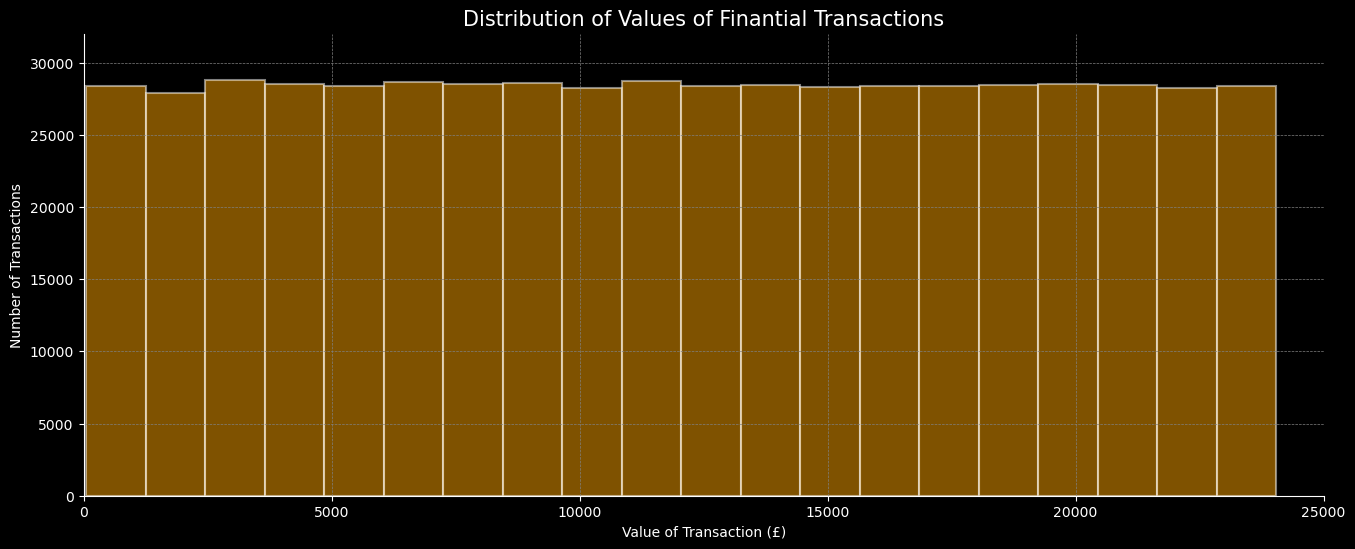

In [6]:
#Lets set up a histogram to have a look at how the 'Amount' column is distributed.
plt.figure(figsize=(16,6))
plt.xlim(0, 25000)
plt.ylim(0,32000)
plt.hist(df['Amount'], bins = 20,
         color= 'orange', 
         edgecolor = 'white', 
         alpha = 0.5, 
         linewidth = 1.5)

#All the usual bells and whistles to keep the styling in line with this notebook.
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.title('Distribution of Values of Finantial Transactions', size = 15)
plt.xlabel('Value of Transaction (£)')
plt.ylabel('Number of Transactions')
plt.show()

^

Looking at the above plot we can see that the 'Amount' column is almost completely evenly distributed, suggesting that there's an equal 
amount of financial transactions from £50 to £24,000.

Just for fun, let's double check this by plotting a KDEplot (Kernel Density Estimation plot).


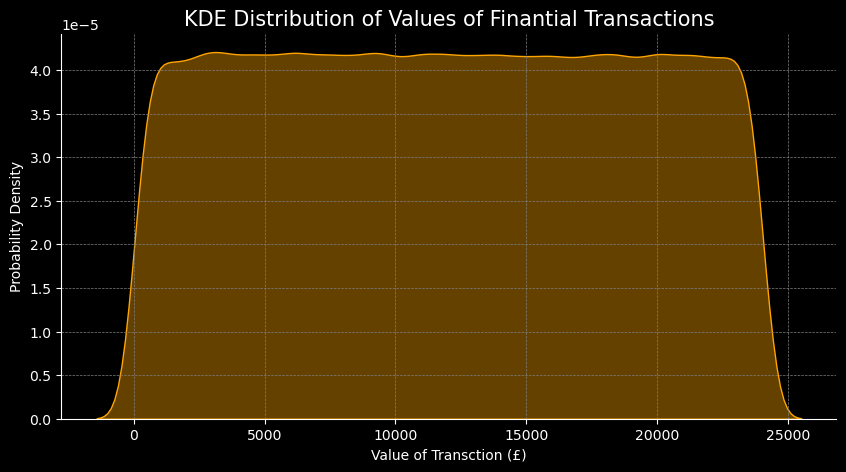

In [7]:
#Create plot.
plt.figure(figsize=(10,5))
sns.kdeplot(df['Amount'], color = 'orange', fill=True, alpha = 0.4)

#Align styling.
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.title('KDE Distribution of Values of Finantial Transactions', size= 15)
plt.xlabel('Value of Transction (£)')
plt.ylabel('Probability Density')
plt.show()

^

Ok, so this is essentially a different way to view the same data as the histogram, only continuous; and it confirms our initial presumption of the 'Amount' data being very evenly distributed. It's worth bearing in mind here that the y-axis is scaled by a factor of 1e-5. Therefore, the probability of seeing any given value is extremely small. Which again solidifies our presumption that the prices are evenly distributed.
- So, 4.0 is really a 0.004% chance of observing this amount.


Let's now check for correlation between the features. This being a synthetic dataset that was, perhaps, created using some pseudo-random number generators, we wouldn't expect much, if any, correlation.


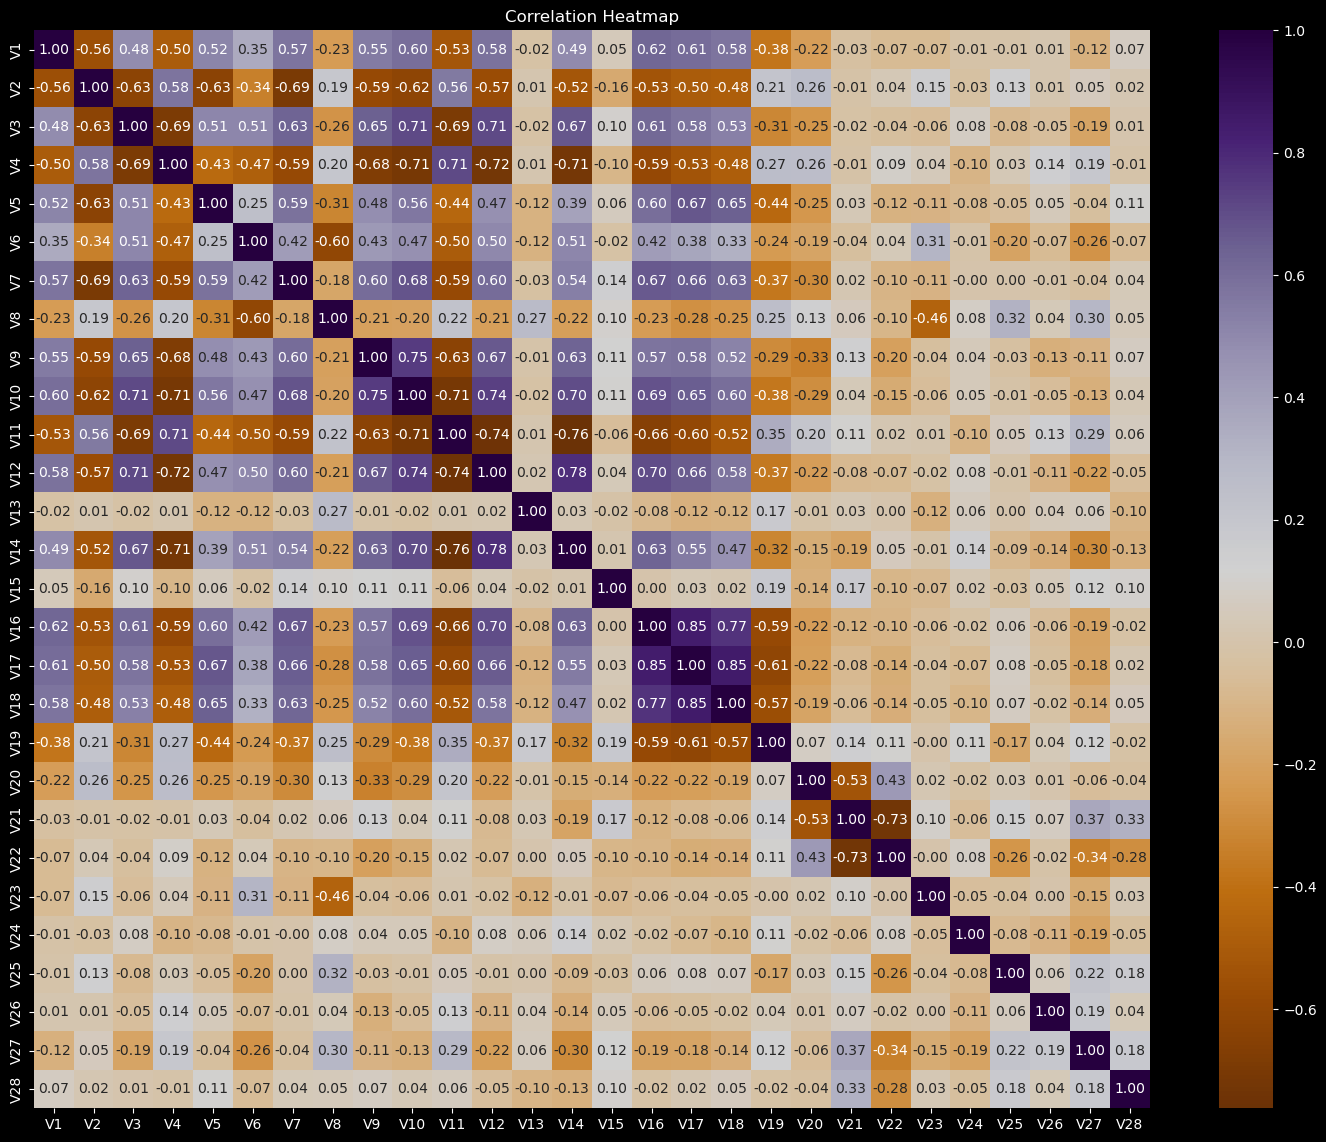

In [8]:
#Pandas has a nice method that gets the correlation between all columns. Using the 'Pearson' method as default.
correlation_matrix = df[df.columns[1:-2]].corr()

#Creating the plot, injecting some orange in here to match the notebook theme. 
plt.figure(figsize=(18,14))
sns.heatmap(correlation_matrix, cmap="PuOr", alpha = 0.85, annot = True, fmt = '.02f')
plt.title("Correlation Heatmap")
plt.show()

^

Fairly surprisingly, we can see that there's some strong positive and negative correlation (the less white, the stronger the correlation), particularly V9, 10, 11, 12, 14, 16, 17, 18.

But since this is synthetic data, and we're not exactly sure of the context of these features, we're not going to worry too much about multicollinearity (how features relate amongst themselves). We can't make any assumptions about the features since we don't REALLY know what they are. Had we have known more about the individual columns, or features, we could have investigated further and analyzed pairs of features more closely. But it's interesting to note that correlation exists in the dataset.

Just out of curiosity, let's make a quick pairplot to visualize some of the more correlated features.

/Users/danielanderson/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


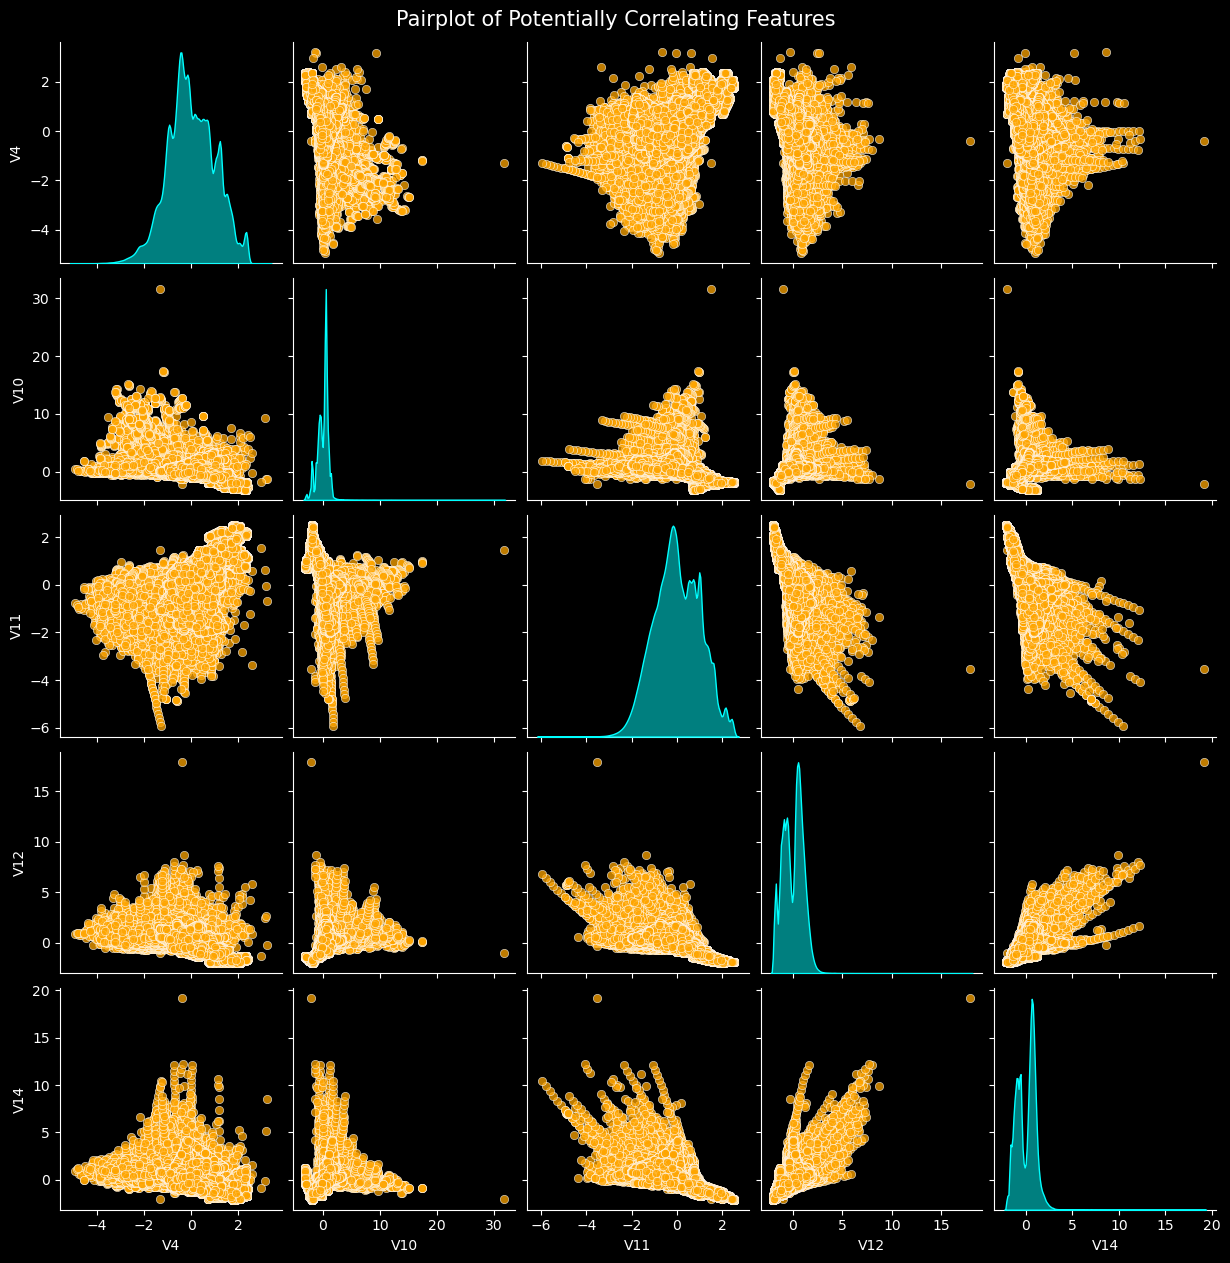

In [9]:
#Selecting 5 of the more correlated features.
data = df[['V4', 'V10', 'V11', 'V12', 'V14']]

sns.pairplot(data,
             diag_kind = 'kde',
             plot_kws = {'color' : 'orange', 'alpha': 0.75},
             diag_kws = {'color' : 'cyan', 'fill': True, 'alpha': 0.5} )

plt.suptitle('Pairplot of Potentially Correlating Features', size = 15, y = 1.01)
plt.show()

^

Looking at the above plot we can see some slight correlation, but nothing that you could describe as 'linear'. Had two features truly been strongly correlated, we would have seen something that resembled a line. Although, some of the minor-plots here almost look like fireworks...

Out of good measure, let's have a look at *the* most correlated pair of features.

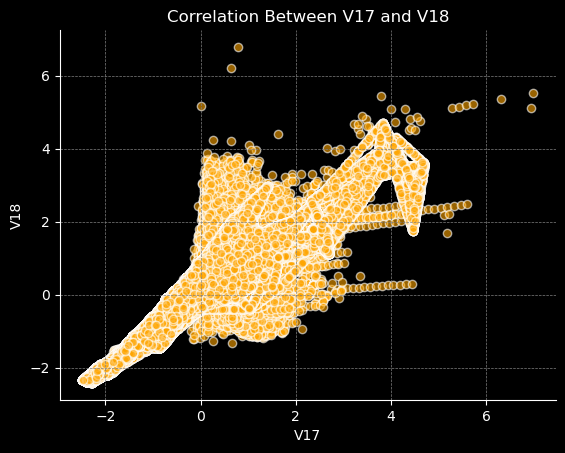

In [10]:
plt.scatter(df['V17'], df['V18'], color = 'orange', alpha = 0.6, edgecolor = 'white')

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.title('Correlation Between V17 and V18')
plt.xlabel('V17')
plt.ylabel('V18')
plt.show()

^

You can see where a line *could* be drawn here, but again, given we don't know the context of the features, the correlation isn't so high that we should consider dropping a column.

# Step 2: Preparing / Feature Engineering
---
Ok, now that we've had a quick explore of our data. We can begin to apply some of the things we've identified.
1. The distribution of Fraud / Non-Fraud needs to be fixed.
2. Some extreme outliers need to be dropped.
3. Data needs to be split into train/ test/ validate.

Fortunately for us, this dataset is very clean already, and doesn't need a whole lot of work. Given that we don't know what the features exactly relate to, we're not going to drop any, nor create any new features from existing data.

There is still the question, however, whether to use the 'Amount' column in the feature-set. Should the amount of a transaction be considered when training a model to detect fraud? In the real world, probably, because the amount could be engineered to be reflective of your 'usual' spend, and if it *was* significantly greater than your 'normal' spending range this would be suspicious. But here, there are no repeat users, by that I mean each of the 500,000 rows is a different user, therefore there are no 'usual' trends between users, rendering the 'Amount' column obsolete for our particular investigation.  

In this examination we WON'T be keeping the 'Amount' column for the Machine Learning algorithms to learn. In a real-world situation, the amount of the transaction would be crucial, given the bank's knowledge of previous purchase history and user trends etc. 


Let's start by reducing the number of Fraud instances, since a 50/50 split is clearly unrealistic.

In [11]:
#Let's start by randomizing the dataset, although I suspect that it's fairly
#random already.
df = df.sample(frac = 1, random_state = 42)

#Split it by 'Class'
fraud_subset = df[df['Class'] == 1]
non_fraud_subset = df[df['Class'] == 0]

#Defining the quantity of rows to keep, using a percent of the total fraud instances.
samples_to_keep = int(0.25 * len(fraud_subset))

#Randomly selecting chosen number of rows.
undersampled_fraud_subset = fraud_subset.sample(n=samples_to_keep, random_state=42)

#Concatenating the two class-divided dataframes back together
#and randomizing the new dataset (otherwise there would be thousands 
#of non-fraud followed by fraud).
df_bal = pd.concat([non_fraud_subset, undersampled_fraud_subset])
df_bal = df_bal.sample(frac = 1, random_state = 42)

#Let's take a look at the new balance of the 'Class' column, as a percentage.
print(df_bal['Class'].value_counts(normalize = True))

Class
0    0.800002
1    0.199998
Name: proportion, dtype: float64


^

Ok, so I think that an 80/20 split is way more realistic, albeit probably still too extreme. Real non-fraud to fraud is likely to be a 99/1 split, and the banks would have to over-sample the fraud instances to tune the Machine Learning model; otherwise, the model could just constantly predict non-fraud and achieve 99% accuracy. However, for the purposes of this examination this split should work fine for us. 

Now let's see if those extreme outliers have been randomly taken away by the previous sampling step.

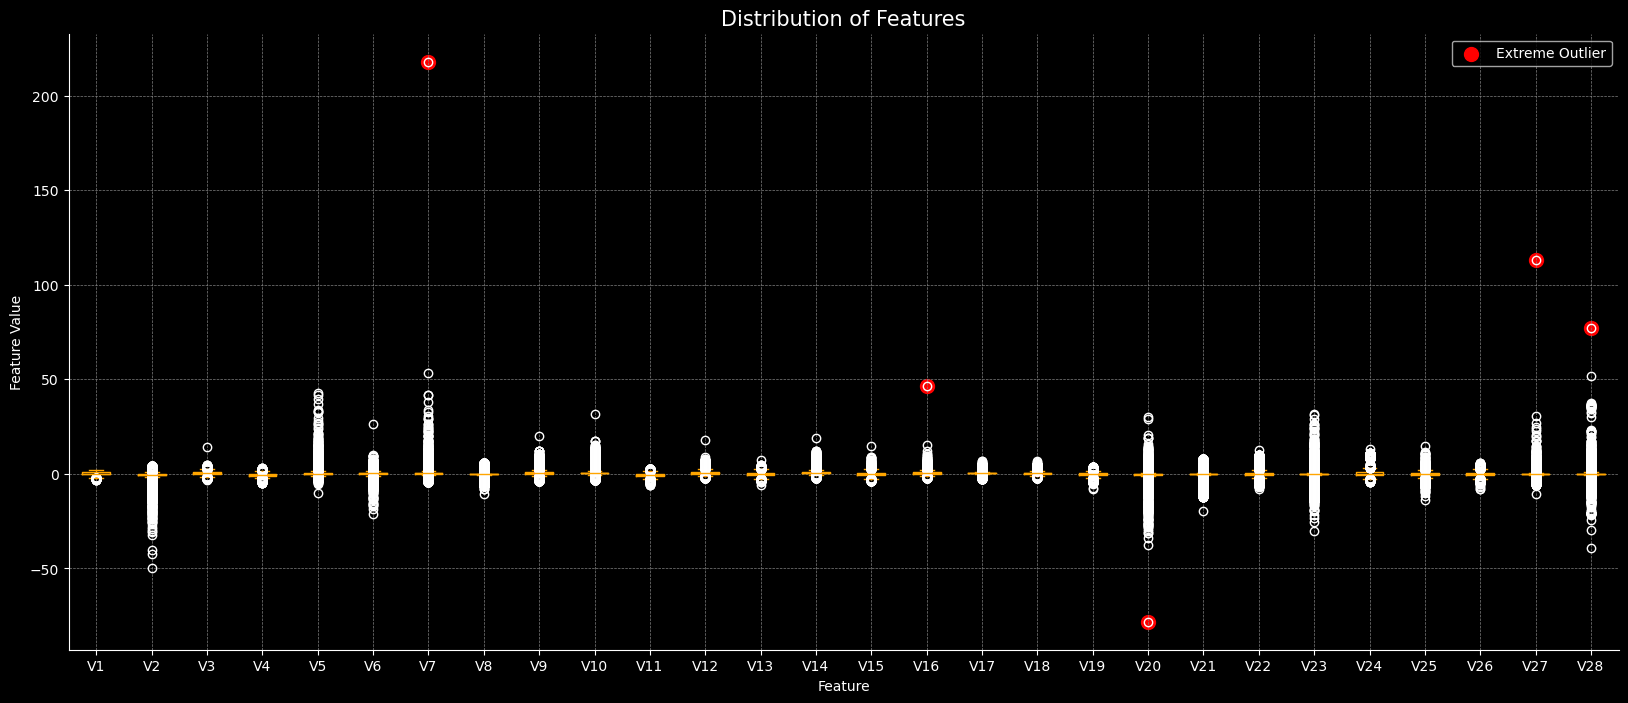

In [12]:
#Let's copy the code from the last box plot and replace the dataframe name. 
plt.figure(figsize = (20,8))
df_bal.boxplot(column = df.columns.tolist()[1:-2], color= 'orange')

max_val_1 = df_bal['V7'].max()
plt.scatter(7, max_val_1, color='red', marker='o', s=100, label='Extreme Outlier')
max_val_2 = df_bal['V16'].max()
plt.scatter(16, max_val_2, color='red', marker='o', s=100)
max_val_3 = df_bal['V20'].min()
plt.scatter(20, max_val_3, color='red', marker='o', s=100)
max_val_4 = df_bal['V27'].max()
plt.scatter(27, max_val_4, color='red', marker='o', s=100)
max_val_5 = df_bal['V28'].max()
plt.scatter(28, max_val_5, color='red', marker='o', s=100)

ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.legend()
plt.title('Distribution of Features', size = 15)
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.show()

^

Ok, the extreme outliers are still there, so let's get rid of them and then see how our data looks.

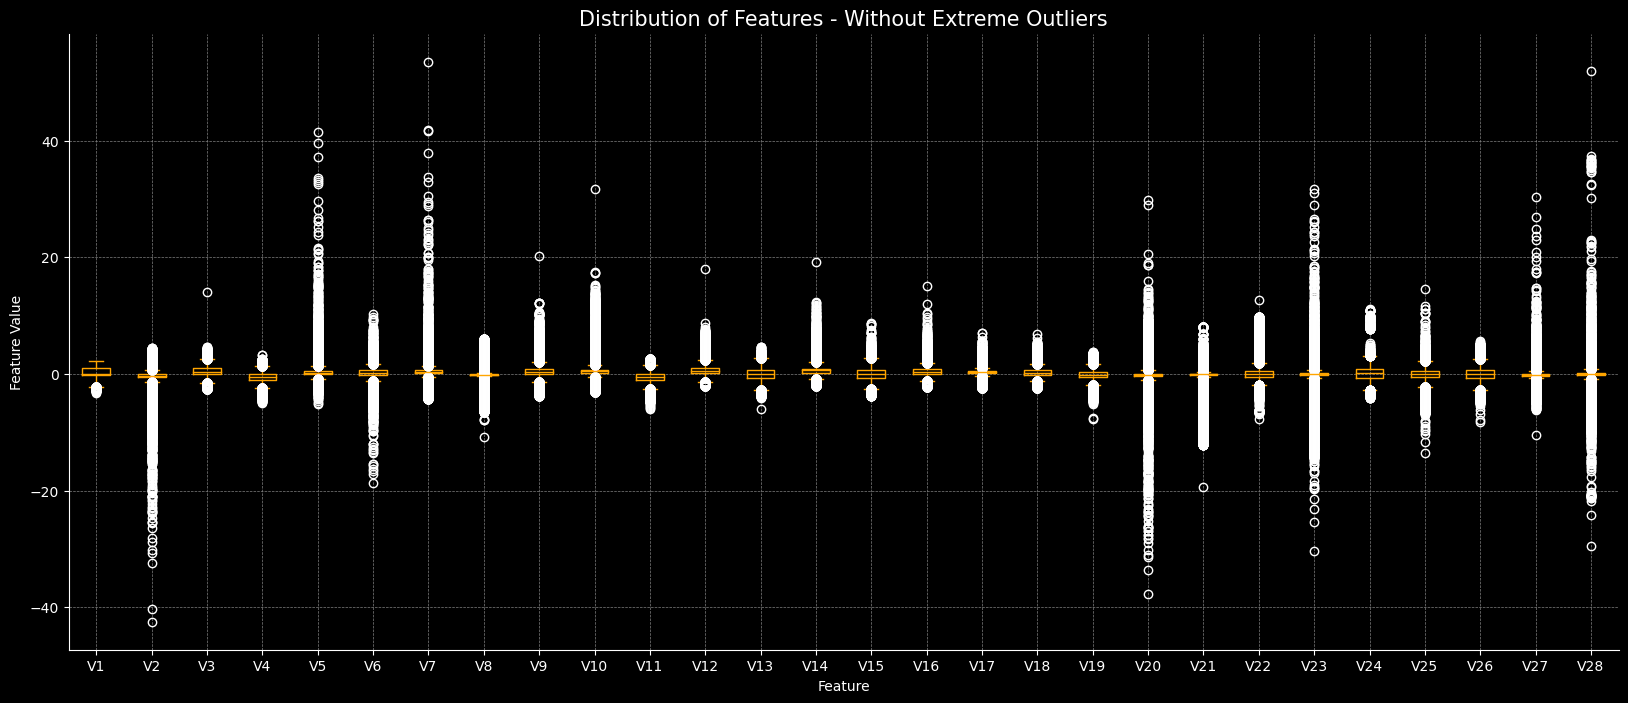

In [13]:
#Finding the indicies of the outliers and dropping them in-place.
df_bal.drop([df_bal['V7'].idxmax(),
             df_bal['V16'].idxmax(),
             df_bal['V20'].idxmin(),
             df_bal['V27'].idxmax(),
             df_bal['V28'].idxmax()],
           inplace = True)

#Re-plotting the data just to visually confirm:
plt.figure(figsize = (20,8))
df_bal.boxplot(column = df.columns.tolist()[1:-2], color= 'orange')


ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)


plt.title('Distribution of Features - Without Extreme Outliers', size = 15)
plt.xlabel('Feature')
plt.ylabel('Feature Value')
plt.show()

^

Well, the extreme outliers are gone, but the data is still noticeably spread out, which I suspect comes from the synthetic nature of the data. It does, however, look better than before. 

All of the values being centred around 0 so perfectly also makes the data appear fabricated, but as previously stated we know this and we're not going to dwell on it too much longer. We'll just have one more closer look at a select few columns and their distributions.

We could just loop over the dataset and check all of the columns, but I don't think that that's necessary. So, let's take a selection of 5 features and check their distributions with a histogram. 

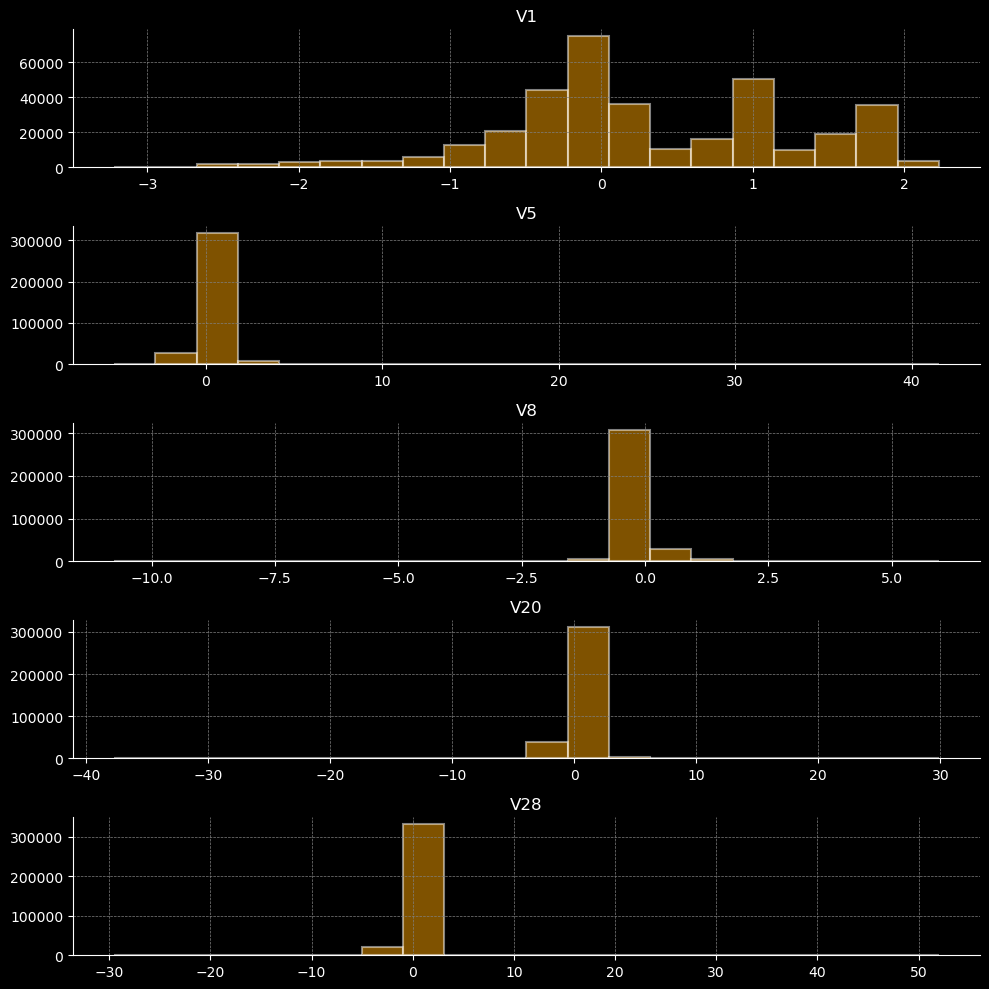

In [14]:
plt.figure(figsize=(10,10))

### V1 ###
plt.subplot(5,1,1)
plt.hist(df_bal['V1'], bins = 20,
         color= 'orange', 
         edgecolor = 'white', 
         alpha = 0.5, 
         linewidth = 1.5)
plt.title('V1')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

### V5 ###
plt.subplot(5,1,2)
plt.hist(df_bal['V5'], bins = 20,
         color= 'orange', 
         edgecolor = 'white', 
         alpha = 0.5, 
         linewidth = 1.5)
plt.title('V5')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

### V8 ###
plt.subplot(5,1,3)
plt.hist(df_bal['V8'], bins = 20,
         color= 'orange', 
         edgecolor = 'white', 
         alpha = 0.5, 
         linewidth = 1.5)
plt.title('V8')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

### V20 ###
plt.subplot(5,1,4)
plt.hist(df_bal['V20'], bins = 20,
         color= 'orange', 
         edgecolor = 'white', 
         alpha = 0.5, 
         linewidth = 1.5)
plt.title('V20')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

### V28 ###
plt.subplot(5,1,5)
plt.hist(df_bal['V28'], bins = 20,
         color= 'orange', 
         edgecolor = 'white', 
         alpha = 0.5, 
         linewidth = 1.5)
plt.title('V28')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

^

We can see here that they're more or less centred around 0, as seen in the previous plot; and with the exception of 'V1', they're normally distributed, albeit with some long tails and therefore outliers.
V1 doesn't quite resemble a normal, or Gaussian, distribution with its three peaks, but again, given the dataset we're not going to worry about that.


Now, let's split our data, ready to be used with some Machine Learning algorithms.

In [15]:
from sklearn.model_selection import train_test_split

#Choosing our 'label', or target, column.
y = df_bal['Class']

#Selecting our features. We're not including 'Amount' or 'ID', 
#leaving us with just the columns V1-V28.
X = df_bal.drop(['Class', 'id', 'Amount'], axis = 1)

#Breaking off 40% to be used as test and validate datasets.
#Making sure to stratify the split on y to conserve the 80/20 split 
#in the 'Class' column.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.4,
                                                     stratify = y,
                                                     random_state = 42)

#Halfing the X/y_temp datasets to create a test set, and validate set. 
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, 
                                                     test_size = 0.5,
                                                     stratify = y_temp,
                                                     random_state = 42)

#Let's check the split of our new data.
print(f'y_train split =\n{y_train.value_counts(normalize = True)}\n'\
     f'y_train size = {y_train.size}\n'\
     f'Percent of original size = {y_train.shape[0]/ df_bal.shape[0]} \n\n')

print(f'y_test split =\n{y_test.value_counts(normalize = True)}\n'\
     f'y-test size = {y_test.size}\n\n'\
     f'Percent of original size = {y_test.shape[0]/ df_bal.shape[0]} \n\n')

print(f'y_val split =\n{y_val.value_counts(normalize = True)}\n'\
     f'y_val size = {y_val.size}\n\n'\
     f'Percent of original size = { y_val.shape[0]/ df_bal.shape[0]} \n\n')

y_train split =
Class
0    0.799999
1    0.200001
Name: proportion, dtype: float64
y_train size = 213234
Percent of original size = 0.5999983117186423 


y_test split =
Class
0    0.800008
1    0.199992
Name: proportion, dtype: float64
y-test size = 71078

Percent of original size = 0.19999943723954744 


y_val split =
Class
0    0.799997
1    0.200003
Name: proportion, dtype: float64
y_val size = 71079

Percent of original size = 0.2000022510418103 




^

Ok, so it looks like our data has been split to be:
- 60% data for training.
- 20% data for testing.
- 20% data for the final validation.

And the label class-splits have been conserved. Our data is ready to be put into some algorithms.


# Step 3: Machine Learning
---
In this investigation we'll be keeping track of many metrics, including F1 Score - a balance between Precision and Recall. Which, in this financial dataset equates to correctly identifying fraud (Recall) and minimizing false alarms (Precision). Most importantly, we'll be looking at the quantity of incorrectly categorized fraud, since reducing this number directly helps the user. 

We're going to handle this task by implementing these classifying algorithms:
- Naive Bayes
- Logistic Regression 
- Random Forest
- Support Vector Machines
- Extreme Gradient Boosting

For each, we'll first try an 'un-tuned' model, with its default settings, then we'll use Grid Search Cross-fold Validation to try and find the best parameters for the model; to keep a track of our results we'll plug all the metrics into a dataframe. 

Let's start by importing our first model and all of the supporting metrics. 

In [16]:
from sklearn.naive_bayes import GaussianNB

from scikitplot.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, \
                            f1_score, roc_auc_score, confusion_matrix

--  
## Naive Bayes
--    

Let's start off with a Naive Bayes classifier, simple and efficient - and there's no hyperparameters to tune - so it'll make a quick 'base' to compare the other models against. 

But first, let's create our blank dataframe ready for the results. 

In [17]:
#Creating and having a look at our empty dataframe.
results_df = pd.DataFrame(columns = ['Model_Name','Accuracy', 'Precision', 'Recall', 
                                     'F1_Score', 'ROC_AUC', 'Missed_Fraud'])
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud


Accuracy:  0.9537972368384029
Precision: 0.9130204791052672
Recall:    0.8499472388322195
F1 score:  0.8803555814631303
ROC AUC:   0.9148528027163226


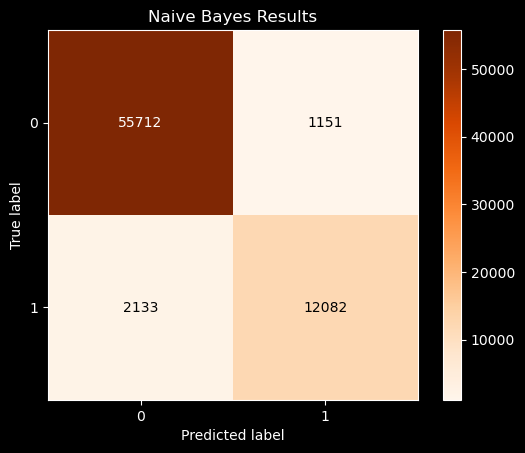

In [18]:
#Instantiating a Gaussian Naive Bayes model.
gnb = GaussianNB().fit(X_train, y_train)

#Getting the predictions for the test-set.
gnb_y_preds = gnb.predict(X_test)

#Let's print out the results before we put them into our dataframe.
print(f'Accuracy:  {accuracy_score(y_test, gnb_y_preds)}')
print(f'Precision: {precision_score(y_test, gnb_y_preds)}')
print(f'Recall:    {recall_score(y_test, gnb_y_preds)}')
print(f'F1 score:  {f1_score(y_test, gnb_y_preds)}')
print(f'ROC AUC:   {roc_auc_score(y_test, gnb_y_preds)}')

#And let's have a look at the confusiton matrix. Which shows us
#the results visually. 
plot_confusion_matrix(y_test, gnb_y_preds, cmap = 'Oranges')
plt.title('Naive Bayes Results')
plt.show()

^

Ok, so the results for the very first model aren't terrible, but we can certainly do better. Looking at the confusion matrix here, we can see that out of the 71,000 financial transactions in the 'test' set, 2,133 were instances of fraud that wouldn't have been predicted correctly. And there were 1,151 instances which were predicted as fraud but actually weren't. The latter is less severe, since a customer wouldn't have lost any money, but their account may have been blocked. The former **is** severe, however, so let's try and reduce this number more in subsequent models.


Let's write a function to input the data into our dataframe to save time later.

In [19]:
# Defining function.
def add_to_df(df, y_test_, y_preds_, name):
    ''' 
    Adds the five metrics to the dataframe df.
    df = the dataframe to add to. 
    y_test_ = the test data.
    y_preds_ = the predictions from the model.
    name = the name of the model.
    '''
    #Getting the scores from given model.
    accuracy  = accuracy_score(y_test_, y_preds_)
    precision = precision_score(y_test_, y_preds_)
    recall    = recall_score(y_test_, y_preds_)
    f1        = f1_score(y_test_, y_preds_)
    roc       = roc_auc_score(y_test_, y_preds_)
    missed    = confusion_matrix(y_test, y_preds_)[1,0]
    #Adding the data to the results_df.
    data = [{
            'Model_Name':   str(name),
            'Accuracy':     accuracy,
            'Precision':    precision,
            'Recall':       recall,
            'F1_Score':     f1,
            'ROC_AUC':      roc,
            'Missed_Fraud': missed
           }]
    
    temp_df = pd.DataFrame(data)
    df1 = pd.concat([df, temp_df], ignore_index = True)
    
    #Checking if there's any duplicates.
    df1 = df1.drop_duplicates() 
    
    return df1

#Let's see what it looks like with the Naive Bayes results.
results_df = add_to_df(results_df, y_test, gnb_y_preds, 'GaussianNB')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.91302,0.849947,0.880356,0.914853,2133


--
## Logistic Regression
--

Ok, so now we have our dataframe ready with a simple Naive Bayes model, we can start using some more advanced techniques.  

Let's try a Logistic Regression model without any tuning, then we'll use GridSearchCV to find the best hyperparameters. 

Before that, let's create scaled versions of our data, since some algorithms work best with scaled data.

In [20]:
# Let's scale our 3 sets of features. Train, Test and Validate.
scaler = MinMaxScaler(feature_range = (-1,1))

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_val_scaled = scaler.fit_transform(X_val)

In [21]:
from sklearn.linear_model import LogisticRegression

#Training the base Logistic Regression Model.
lr_base = LogisticRegression().fit(X_train, y_train)

#Making the predictions. 
lr_base_y_preds = lr_base.predict(X_test)

#Adding to the dataframe for comparison.
results_df = add_to_df(results_df, y_test, lr_base_y_preds, 'LogReg_BASE')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.91302,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.97601,0.924446,0.949529,0.959383,1074


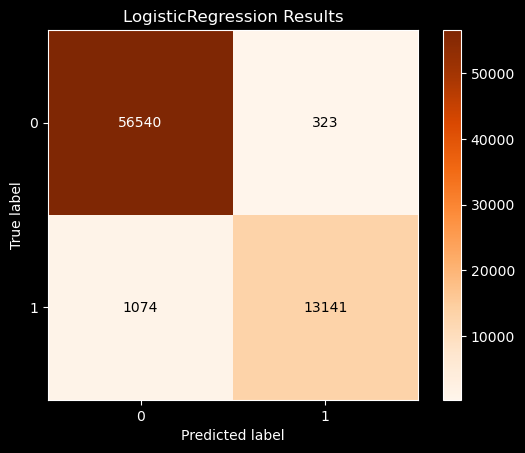

In [22]:
#Printing the confusion matrix for a visual of the results.
plot_confusion_matrix(y_test, lr_base_y_preds, cmap = 'Oranges')
plt.title('LogisticRegression Results')
plt.show()

^

These results are better, all 5 of our metrics are in the 90% range. But I'm sure it can be improved. We still incorrectly predict 1074 financial transactions as non-fraud. 

So let's try another Logistic Regression model, but this time we'll tune it.

In [23]:
#Let's define the parameter grid with which GridSearchCV will search.
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [1000, 10000] 
}

#We'll create a set of scoring parameters for the GridSearch to use when
#evaluating the model on each hyperparameter combination.
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

#Instantiate our Logistic Regression model.
lr_tune = LogisticRegression()

#Instantiate the GridSearch object.
gs_lr = GridSearchCV(lr_tune,
                     param_grid = param_grid_lr,
                     scoring = scoring,
                     refit = 'f1',
                     n_jobs = -1,
                     cv = 5)

#Fitting the training data to the model. 
gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [1000, 10000], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'saga']},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [24]:
#Getting the predictions and adding the results to the dataframe.
gs_lr_y_preds = gs_lr.predict(X_test)

results_df = add_to_df(results_df, y_test, gs_lr_y_preds, 'LogReg_TUNED')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072


^

These results are better, but only very slightly.

Let's see how the model functions with scaled data.

In [25]:
#The same as before, but with the scaled data
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['newton-cg', 'lbfgs', 'saga'],
    'max_iter': [1000, 10000] 
}

scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

lr_tune = LogisticRegression()

gs_lr_scld = GridSearchCV(lr_tune,
                     param_grid = param_grid_lr,
                     scoring = scoring,
                     refit = 'f1',
                     n_jobs = -1,
                     cv=5)

gs_lr_scld.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [1000, 10000], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'saga']},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [26]:
#Predict and add to dataframe.
gs_lr_scld_y_preds = gs_lr_scld.predict(X_test_scaled)

results_df = add_to_df(results_df, y_test, gs_lr_scld_y_preds, 'LogReg_TUNED_SCALED')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903


^

Some fairly interesting data here, the scaled model has higher precision but performs worse in all other metrics. 

Let's get a visual of this using some confusion matrices. 

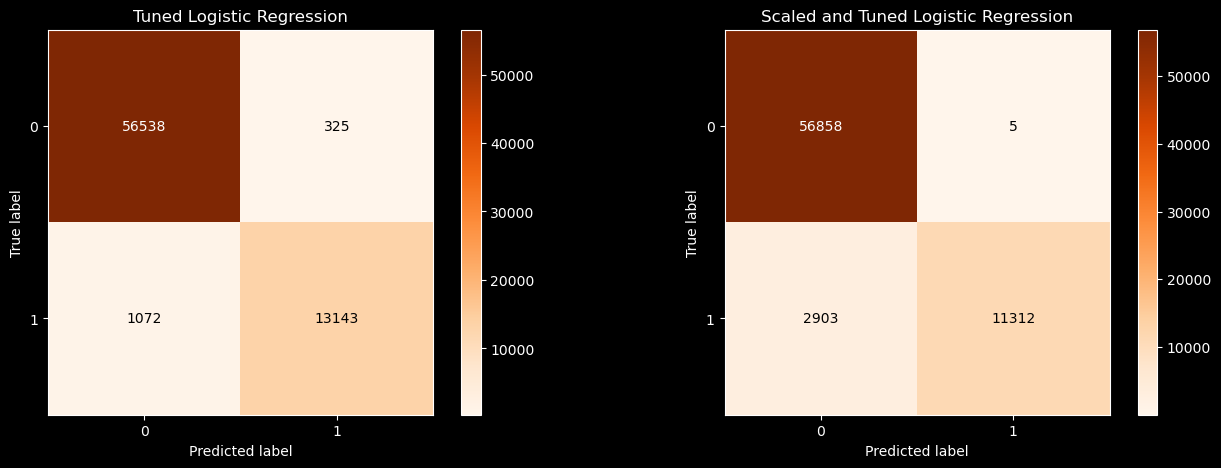

In [27]:
#Creating two axes over which to plot our data.
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,5))

#Plotting the two tuned Logistic Regression results.
plot_confusion_matrix(y_test, gs_lr_y_preds, cmap = 'Oranges', ax= ax1)
ax1.set_title('Tuned Logistic Regression')

plot_confusion_matrix(y_test, gs_lr_scld_y_preds, cmap = 'Oranges', ax=ax2)
ax2.set_title('Scaled and Tuned Logistic Regression')


plt.show()

^ 

Interestingly the Logistic Regression model outputs better results (overall) when given the unscaled data.

The scaled model only incorrectly predicts 5 cases of false positives, which in our case means 5 transactions were predicted to be fraud, but really weren't. But it makes twice as many mistakes when predicting false negatives, with 2,903 cases of real fraud undetected.

I speculate that the reason the unscaled data performed better was that this dataset is synthetic, and is, in general, evenly spread out, (four out of five of the features we looked at in the feature engineering section had approximately normal distributions around 0) and therefore is already scaled by the way the data was generated.

Ok, with some fairly good results from the tuned Logistic Regression model, let's move on to our next ML technique. 

--
## Random Forest
--

Random forest models often give good results in a variety of classification tasks, and are a personal favourite of mine, given their intuitive design. 

Let's start by seeing how well the model performs with default settings. 

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Instantiate the base model.
rf_base = RandomForestClassifier()

rf_base.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
#Creating predictions.
rf_base_y_preds = rf_base.predict(X_test)

results_df = add_to_df(results_df, y_test, rf_base_y_preds, 'RandForest_BASE')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903
4,RandForest_BASE,0.999142,0.998872,0.996834,0.997852,0.998276,45


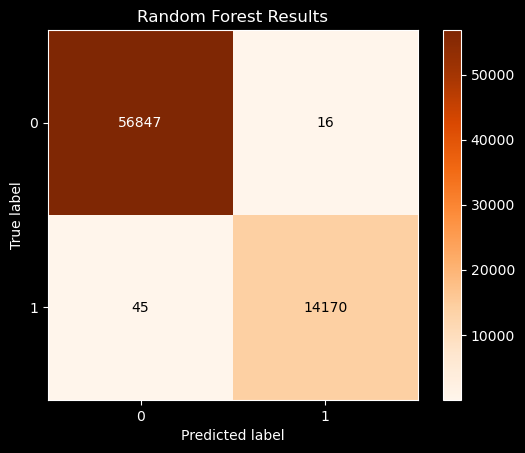

In [29]:
#Having a look at the results of the default settings visually. 
plot_confusion_matrix(y_test, rf_base_y_preds, cmap = 'Oranges')
plt.title('Random Forest Results')
plt.show()

^

Wow, for an untuned model, these results are amazing. Only 45 cases of fraudulent transactions incorrectly categorized. But this could still be 45 people's livelihoods threatened. Let's continue and see if we can do better by tuning the model with GridSearchCV.

In [ ]:
#Commenting-out the code in order to not accidently run it again.

'''
#Defining the parameter grid.
param_grid_rf = {
    'n_estimators': [100,200,300],
    'max_depth': [3,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['sqrt', 6,7] 
}
 

#Instantiating.
rf_tune = RandomForestClassifier()

#Instantiate the GridSearch object.
gs_rf = GridSearchCV(rf_tune,
                     param_grid = param_grid_rf,
                     scoring = scoring,
                     refit = 'f1',
                     n_jobs = -1)

#Fitting the training data to the model. 
gs_rf.fit(X_train, y_train)
'''

^

This took my computer almost 2 hours to run! Let's use pickle to save the results so I can come back whenever I want without running the algorithm again.

In [30]:
import pickle

In [ ]:
#Saving the results for later use.
'''
with open('RandForestTuned.pkl', 'wb') as to_write:
    pickle.dump(gs_rf, to_write)
'''

In [31]:
# Re-opening the results.
with open('RandForestTuned.pkl', 'rb') as to_read:
    gs_rf = pickle.load(to_read)

In [32]:
#Creating predictions.
rf_tune_y_preds = gs_rf.predict(X_test)

results_df = add_to_df(results_df, y_test, rf_tune_y_preds, 'RandForest_TUNE')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903
4,RandForest_BASE,0.999142,0.998872,0.996834,0.997852,0.998276,45
5,RandForest_TUNE,0.985720,0.998038,0.930426,0.963047,0.964984,989


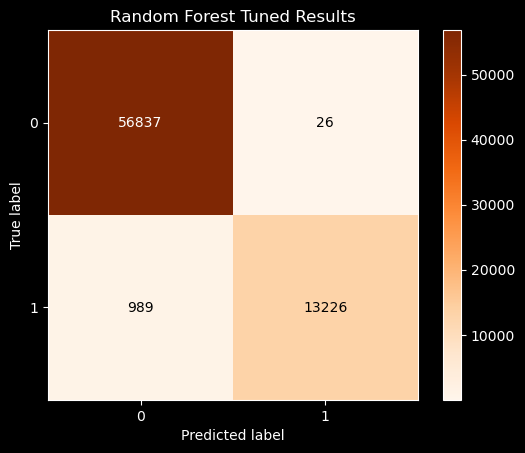

In [33]:
plot_confusion_matrix(y_test, rf_tune_y_preds, cmap = 'Oranges')
plt.title('Random Forest Tuned Results')
plt.show()

^

We can see that the base model Random Forest outperformed the hyperparameter tuned model. This may have to do with some of the parameter-ranges chosen. In particular max_depth, where the default setting is 'None' which is less restrictive than the values chosen in the tuned model. Essentially the default settings allow the tree to grow larger. 

So let's try searching through different hyperparameters but leaving any which control the size of the trees.

In [ ]:
#Pickling this again, since it takes a while to run!
'''
#Defining the parameter grid.
param_grid_rf_2 = {
    'n_estimators': [100,200],
    'criterion': ['gini', 'entropy'],
    'warm_start': [True, False],
    'max_features': [7, 9] 
}
 

#Instantiating.
rf_tune_2 = RandomForestClassifier()

#Instantiate the GridSearch object.
gs_rf_2 = GridSearchCV(rf_tune_2,
                     param_grid = param_grid_rf_2,
                     scoring = scoring,
                     refit = 'f1',
                     n_jobs = -1,
                     cv=5)

#Fitting the training data to the model. 
gs_rf_2.fit(X_train, y_train)
'''

In [ ]:
#Saving the model locally. 
'''
with open('RandForestTuned2.pkl', 'wb') as to_write2:
    pickle.dump(gs_rf_2, to_write2)
'''

In [34]:
#Reading the tuned Random Forest model.
with open('RandForestTuned2.pkl', 'rb') as to_read2:
    gs_rf_2 = pickle.load(to_read2)

In [35]:
#Getting the predictions for the second GridSearch on the Random Forest model.
rf_tune_y_preds_2 = gs_rf_2.predict(X_test)

results_df = add_to_df(results_df, y_test, rf_tune_y_preds_2, 'RandForest_TUNE_2')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903
4,RandForest_BASE,0.999142,0.998872,0.996834,0.997852,0.998276,45
5,RandForest_TUNE,0.985720,0.998038,0.930426,0.963047,0.964984,989
6,RandForest_TUNE_2,0.999395,0.998733,0.998241,0.998487,0.998962,25


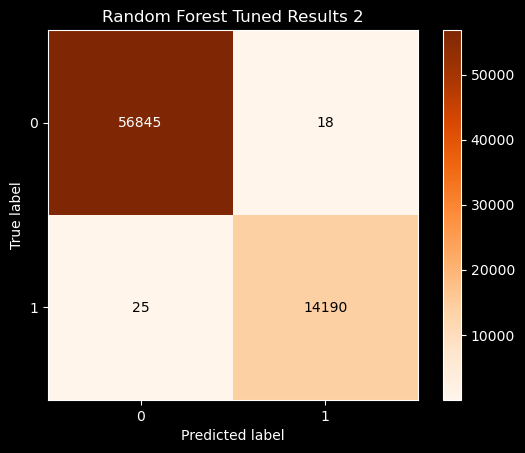

In [36]:
#Getting a visual.
plot_confusion_matrix(y_test, rf_tune_y_preds_2, cmap = 'Oranges')
plt.title('Random Forest Tuned Results 2')
plt.show()

^

Great, this second GridSearch on the Random Forest model is the best result yet, on all metrics. It seems that letting the trees grow further helped the model better predict unseen data.

Now, let's move on to our next technique.


--
## Support Vector Machines
--

Support Vector Machines are quite computationally intensive and therefore may not be the best choice in real world scenarios where models are re-trained often, and on large datasets. Our feature set is comprised of 28 features and 213,000 rows (for the training data) which is only moderately large, and definitely not in the range of 'big data'. Using my computer locally, however, I may need to be more selective of which hyperparameters to try in the GridSearch Cross-fold Validation. 

Let's start, as usual, with the base model. 

In [37]:
#Importing the support vector machine classifier.
from sklearn.svm import SVC

#Instantiating the base model.
svc_base = SVC()

svc_base.fit(X_train, y_train)

SVC()

In [38]:
#Making the predictions.
svc_base_y_preds = svc_base.predict(X_test)

#And checking the results.
results_df = add_to_df(results_df, y_test, svc_base_y_preds, 'SVM_BASE')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903
4,RandForest_BASE,0.999142,0.998872,0.996834,0.997852,0.998276,45
5,RandForest_TUNE,0.985720,0.998038,0.930426,0.963047,0.964984,989
6,RandForest_TUNE_2,0.999395,0.998733,0.998241,0.998487,0.998962,25
7,SVM_BASE,0.995878,0.995798,0.983539,0.989630,0.991250,234


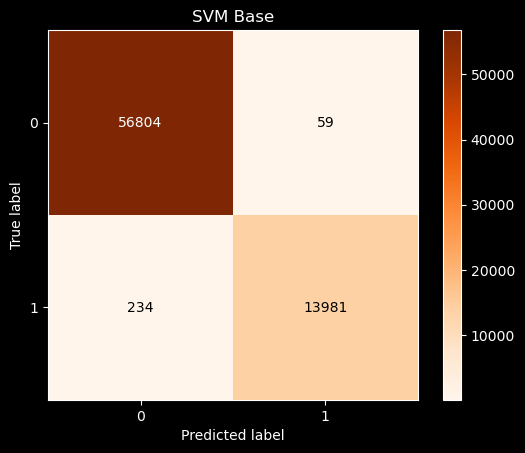

In [39]:
plot_confusion_matrix(y_test, svc_base_y_preds, cmap = 'Oranges')
plt.title('SVM Base')
plt.show()

^

Not bad results, not quite as good as the Random Forest, but better than Naive Bayes and Logistic Regression. 

Let's use the Support Vector Machine to test my hypothesis that the data is already pseudo-scaled and scaling it again won't improve the results:

In [40]:
#Instantiate a scaled SVM classifier
svc_base_scld = SVC()

#Fitting the scaled data.
svc_base_scld.fit(X_train_scaled, y_train)

SVC()

In [41]:
#Getting predictions for the scaled data.
svc_base_scld_preds = svc_base_scld.predict(X_test_scaled)

results_df = add_to_df(results_df, y_test, svc_base_scld_preds, 'SVM_BASE_SCALED')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903
4,RandForest_BASE,0.999142,0.998872,0.996834,0.997852,0.998276,45
5,RandForest_TUNE,0.985720,0.998038,0.930426,0.963047,0.964984,989
6,RandForest_TUNE_2,0.999395,0.998733,0.998241,0.998487,0.998962,25
7,SVM_BASE,0.995878,0.995798,0.983539,0.989630,0.991250,234
8,SVM_BASE_SCALED,0.921495,0.999422,0.607809,0.755906,0.803860,5575


^

Ok, so it **does** perform worse, I think it fairly safe to say that scaling the data with this dataset doesn't seem to have any positive effect on predictions, most likely due to its synthetic nature.

That said, let's apply some tuning to the SVM, but since SVMs are quite computationally intensive, we'll try and keep the parameter_grid to a minimum and just use the three most important parameters: C, gamma and kernel.

In [ ]:
#After taking an hour to run, let's pickle the variable for use later.
'''
#Defining the parameter grid.
param_grid_SVC = {
    'C': [0.1,1.0,10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['auto', 0.1],
     
}
 

#Instantiating.
svc_tune = SVC()

#Instantiate the GridSearch object.
gs_svc = GridSearchCV(svc_tune,
                     param_grid = param_grid_SVC,
                     scoring = scoring,
                     refit = 'f1',
                     n_jobs = -1,
                     cv=5,
                     verbose = 1)

#Fitting the training data to the model. 
gs_svc.fit(X_train, y_train)
'''

In [ ]:
#Saving.
'''
with open('SVMTuned.pkl', 'wb') as to_write3:
    pickle.dump(gs_svc, to_write3)
'''

In [42]:
#Reading back in.
with open('SVMTuned.pkl', 'rb') as to_read3:
    gs_svc = pickle.load(to_read3)

In [43]:
gs_svc_y_preds = gs_svc.predict(X_test)

results_df = add_to_df(results_df, y_test, gs_svc_y_preds, 'SVM_TUNED')
results_df


,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903
4,RandForest_BASE,0.999142,0.998872,0.996834,0.997852,0.998276,45
5,RandForest_TUNE,0.985720,0.998038,0.930426,0.963047,0.964984,989
6,RandForest_TUNE_2,0.999395,0.998733,0.998241,0.998487,0.998962,25
7,SVM_BASE,0.995878,0.995798,0.983539,0.989630,0.991250,234
8,SVM_BASE_SCALED,0.921495,0.999422,0.607809,0.755906,0.803860,5575
9,SVM_TUNED,0.999465,0.998173,0.999156,0.998664,0.999349,12


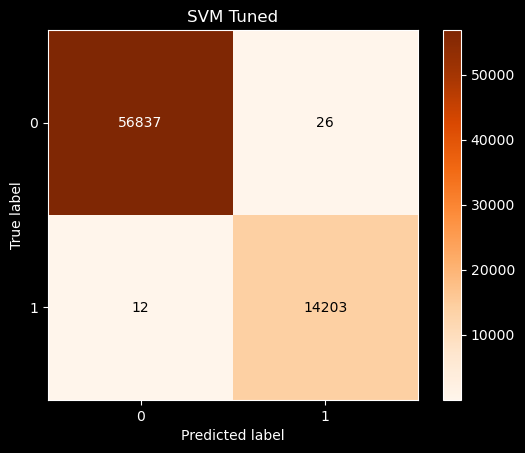

In [44]:
plot_confusion_matrix(y_test, gs_svc_y_preds, cmap = 'Oranges')
plt.title('SVM Tuned')
plt.show()

^

These results are the best yet, with only 12 fraudulent transactions going unnoticed out of 71,000 total transactions. This is surprising given our limited hyperparameter GridSearch.

It may be worth looking at the best parameters from this model and applying them to another model to further tune.

In [45]:
#Checking which parameters perfromed best.
gs_svc.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
#Using the best parameters from the previous model, 
#and searching over a couple more.

#Let's pickle this for later use.
'''
param_grid_svc_2 = {
    'C': [10],
    'gamma': [0.1],
    'kernel': ['rbf'],
    'tol': [1e-4, 1e-3, 1e-2],
    'shrinking': [True, False]
}

svc_tune_2 = SVC()

gs_svc_2 = GridSearchCV(svc_tune_2,
                     param_grid = param_grid_svc_2,
                     scoring = scoring,
                     refit = 'f1',
                     n_jobs = -1,
                     cv=5,
                     verbose = 1)

gs_svc_2.fit(X_train, y_train)
'''

In [ ]:
'''
with open('SVMTuned2.pkl', 'wb') as to_write4:
    pickle.dump(gs_svc_2, to_write4)
'''

In [46]:
with open('SVMTuned2.pkl', 'rb') as to_read4:
    gs_svc_2 = pickle.load(to_read4)

In [47]:
gs_svc_y_preds_2 = gs_svc_2.predict(X_test)

results_df = add_to_df(results_df, y_test, gs_svc_y_preds_2, 'SVM_TUNED_2')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903
4,RandForest_BASE,0.999142,0.998872,0.996834,0.997852,0.998276,45
5,RandForest_TUNE,0.985720,0.998038,0.930426,0.963047,0.964984,989
6,RandForest_TUNE_2,0.999395,0.998733,0.998241,0.998487,0.998962,25
7,SVM_BASE,0.995878,0.995798,0.983539,0.989630,0.991250,234
8,SVM_BASE_SCALED,0.921495,0.999422,0.607809,0.755906,0.803860,5575
9,SVM_TUNED,0.999465,0.998173,0.999156,0.998664,0.999349,12


^

It seems as though the three parameters: C, gamma and kernel, were the most important, given that the two additional parameters in the second model didn't affect any of the 5 evaluation metrics.

Ok, let's move on to our final ML method.

--
## XGBoost
--

It's said that eXtreme Gradient Boosted models are some of the best 'out of the box' models available. Let's put them to the test with our dataset.

In [48]:
#Let's import the XGBoost classifer
from xgboost import XGBClassifier

#Now let's try a base model.
xgb_base = XGBClassifier()

xgb_base.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [49]:
#Predicting and visualizing.
xgb_base_y_preds = xgb_base.predict(X_test)

results_df = add_to_df(results_df, y_test, xgb_base_y_preds, 'XGBoost_BASE')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903
4,RandForest_BASE,0.999142,0.998872,0.996834,0.997852,0.998276,45
5,RandForest_TUNE,0.985720,0.998038,0.930426,0.963047,0.964984,989
6,RandForest_TUNE_2,0.999395,0.998733,0.998241,0.998487,0.998962,25
7,SVM_BASE,0.995878,0.995798,0.983539,0.989630,0.991250,234
8,SVM_BASE_SCALED,0.921495,0.999422,0.607809,0.755906,0.803860,5575
9,SVM_TUNED,0.999465,0.998173,0.999156,0.998664,0.999349,12


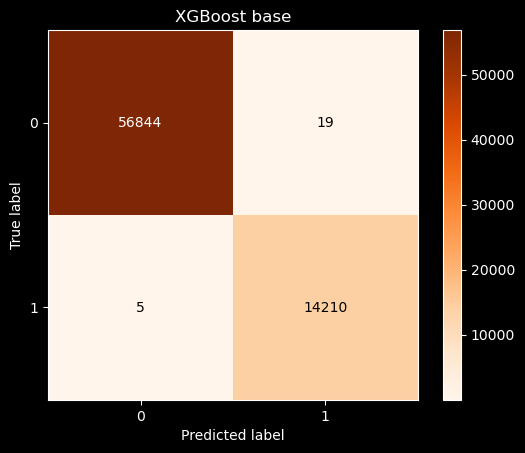

In [50]:
plot_confusion_matrix(y_test, xgb_base_y_preds, cmap = 'Oranges')
plt.title('XGBoost base')
plt.show()

^

Amazing, this untuned model performs even better than the tuned Support Vector Machine. Only 5 out of 14,215 instances of fraud incorrectly predicted, and 19 'false alarms' predicted out of 56,863 instances of non-fraud. 

With only 24 total incorrect predictions remaining, let's see how well it reacts to hyperparameter tuning. 

In [ ]:
#Creating parameters.
#Keeping the depth of the trees (weak-learners) quite large, since large
#trees performed well in the Random Forest models.

#Pickling to save time later.
'''
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],  
    'max_depth': [6, 7, 8],            
    'n_estimators': [100, 200, 250],     
    'subsample': [0.75, 0.8, 0.85],
    'gamma': [0, 0.1, 0.2],  
    
}
 
xgb_tune = XGBClassifier(use_label_encoder=False)

gs_xgb = GridSearchCV(xgb_tune,
                     param_grid = param_grid_xgb,
                     scoring = scoring,
                     refit = 'f1',
                     n_jobs = -1,
                     cv=5,
                     verbose = 1)

gs_xgb.fit(X_train, y_train)
'''

In [ ]:
'''
with open('XGBTuned.pkl', 'wb') as to_write5:
    pickle.dump(gs_xgb, to_write5)
'''

In [51]:
with open('XGBTuned.pkl', 'rb') as to_read5:
    gs_xgb = pickle.load(to_read5)

In [52]:
gs_xgb_y_preds = gs_xgb.predict(X_test)

results_df = add_to_df(results_df, y_test, gs_xgb_y_preds, 'XGBoost_TUNED')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903
4,RandForest_BASE,0.999142,0.998872,0.996834,0.997852,0.998276,45
5,RandForest_TUNE,0.985720,0.998038,0.930426,0.963047,0.964984,989
6,RandForest_TUNE_2,0.999395,0.998733,0.998241,0.998487,0.998962,25
7,SVM_BASE,0.995878,0.995798,0.983539,0.989630,0.991250,234
8,SVM_BASE_SCALED,0.921495,0.999422,0.607809,0.755906,0.803860,5575
9,SVM_TUNED,0.999465,0.998173,0.999156,0.998664,0.999349,12


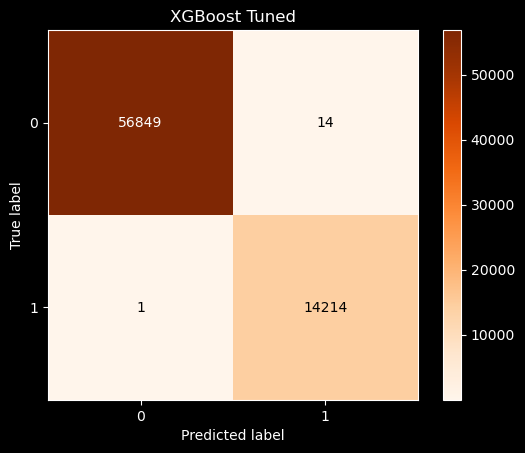

In [53]:
plot_confusion_matrix(y_test, gs_xgb_y_preds, cmap = 'Oranges')
plt.title('XGBoost Tuned')
plt.show()

^

Even better, only 1 instance of fraud went undetected, with an accuracy of 99.97%. In fact, the worst metric, precision, was 99.9% which we can see with the 14 false positives: since precision is calculated by dividing the true positives by the sum of the true and false positives.

Any more tuning is likely to overfit the data, but for the sake of argument let's add in three more hyperparameters to search over, and let's use the best parameters from this model as a basis. 

In [54]:
#Printing the best parameters.
gs_xgb.best_params_

{'gamma': 0,
 'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 250,
 'subsample': 0.75}

In [55]:
#Plugging in our best parameters from the previous model, and adding
#some more regularization and feature selection.
param_grid_xgb_2 = {
    'learning_rate': [0.3],  
    'max_depth': [6],            
    'n_estimators': [250],     
    'subsample': [0.75],
    'gamma': [0],
    'colsample_bytree': [0.7, 0.8, 0.9], # % of feature-set
    'reg_alpha': [0, 0.1, 0.2], 
    'reg_lambda': [1, 2, 3]
    
}
 
xgb_tune_2 = XGBClassifier(use_label_encoder=False)

gs_xgb_2 = GridSearchCV(xgb_tune_2,
                     param_grid = param_grid_xgb_2,
                     scoring = scoring,
                     refit = 'f1',
                     n_jobs = -1,
                     cv=5,
                     verbose = 1)

gs_xgb_2.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9], 'gamma': [0],
                         'learning_rate': [0.3], 'max_depth': [6],
                         'n_estimators': [250], 'reg_alpha': [0, 0.1, 0.2],
                         'reg_lambda': [1, 2, 3], 'subsample': [0.75]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=1)

In [56]:
gs_xgb_y_preds_2 = gs_xgb_2.predict(X_test)

results_df = add_to_df(results_df, y_test, gs_xgb_y_preds_2, 'XGBoost_TUNED_2')
results_df

,Model_Name,Accuracy,Precision,Recall,F1_Score,ROC_AUC,Missed_Fraud
0,GaussianNB,0.953797,0.913020,0.849947,0.880356,0.914853,2133
1,LogReg_BASE,0.980346,0.976010,0.924446,0.949529,0.959383,1074
2,LogReg_TUNED,0.980346,0.975869,0.924587,0.949536,0.959436,1072
3,LogReg_TUNED_SCALED,0.959087,0.999558,0.795779,0.886104,0.897846,2903
4,RandForest_BASE,0.999142,0.998872,0.996834,0.997852,0.998276,45
5,RandForest_TUNE,0.985720,0.998038,0.930426,0.963047,0.964984,989
6,RandForest_TUNE_2,0.999395,0.998733,0.998241,0.998487,0.998962,25
7,SVM_BASE,0.995878,0.995798,0.983539,0.989630,0.991250,234
8,SVM_BASE_SCALED,0.921495,0.999422,0.607809,0.755906,0.803860,5575
9,SVM_TUNED,0.999465,0.998173,0.999156,0.998664,0.999349,12


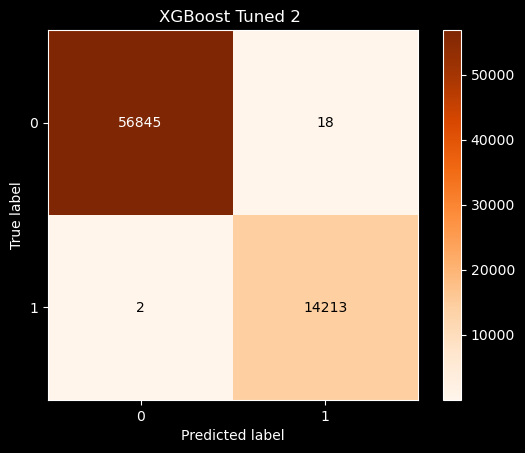

In [57]:
plot_confusion_matrix(y_test, gs_xgb_y_preds_2, cmap = 'Oranges')
plt.title('XGBoost Tuned 2 ')
plt.show()

^

Very slightly worse results here, both in false positive and false negative. The model could be over fitting given too much hyperparameter tuning. Let's have a look at how it performs on the training data.

In [58]:
#Getting the predictions for the training data. 
gs_xgb_train_preds_2 = gs_xgb_2.predict(X_train)

#Comparing how the model predicts the training data,
#with it's predictions on the test data.
print(f'Accuracy:       {accuracy_score(y_test, gs_xgb_y_preds_2)}')
print(f'Train Accuracy: {accuracy_score(y_train, gs_xgb_train_preds_2)}')
print()
print(f'Precision:      {precision_score(y_test, gs_xgb_y_preds_2)}')
print(f'Train Precision:{precision_score(y_train, gs_xgb_train_preds_2)}')
print()
print(f'Recall:         {recall_score(y_test, gs_xgb_y_preds_2)}')
print(f'Train Recall:   {recall_score(y_train, gs_xgb_train_preds_2)}')
print()
print(f'F1 score:       {f1_score(y_test, gs_xgb_y_preds_2)}')
print(f'Train F1 score: {f1_score(y_train, gs_xgb_train_preds_2)}')
print()
print(f'ROC AUC:        {roc_auc_score(y_test, gs_xgb_y_preds_2)}')
print(f'Train ROC AUC:  {roc_auc_score(y_train, gs_xgb_train_preds_2)}')

Accuracy:       0.9997186189819635
Train Accuracy: 1.0

Precision:      0.9987351556461247
Train Precision:1.0

Recall:         0.9998593035525853
Train Recall:   1.0

F1 score:       0.9992969134500458
Train F1 score: 1.0

ROC AUC:        0.999771376623733
Train ROC AUC:  1.0


^

We can see here that it achieves five perfect scores on the training data but performs worse on the test data compared to a lesser-tuned model, thus suggesting overfitting - the model has become too specific to the training data and has started to generalize worse given new, un-seen, data. 

# Step 4: Model Selection
---
Now we've trained 13 different models, let's see how our best model (XGBoost) performs on the validation set. To do this we'll combine the X_train and X_test data to train a new model, using the parameters we found to yield the best results and use *that* to predict y_val. 

In [59]:
#Let's stitch together X_train and X_test to get the final training set.
#This way we can train on more data.

X_final_train = pd.concat([X_train, X_test])
y_final_train = pd.concat([y_train, y_test])

#Using the best performing parameters we found in Step 3. 
xgb_final = XGBClassifier(gamma = 0,
             learning_rate = 0.3,
             max_depth = 6,
             n_estimators = 250,
             subsample = 0.75)

#Fitting 80% of the total available data. 
xgb_final.fit(X_final_train, y_final_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

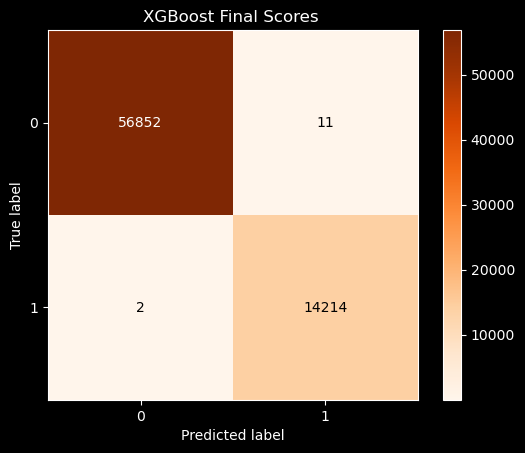

Accuracy:  0.9998171049114366
Precision: 0.9992267135325131
Recall:    0.9998593134496342
F1 score:  0.9995429133996694
ROC AUC:   0.999832933020475


In [60]:
#Getting predictions for the validation set.
xgb_val_preds = xgb_final.predict(X_val)

#Plotting the results to get a visual understanding.
plot_confusion_matrix(y_val, xgb_val_preds, cmap = 'Oranges')
plt.title('XGBoost Final Scores ')
plt.show()

#Printing out the scores.
print(f'Accuracy:  {accuracy_score(y_val, xgb_val_preds)}')
print(f'Precision: {precision_score(y_val, xgb_val_preds)}')
print(f'Recall:    {recall_score(y_val, xgb_val_preds)}')
print(f'F1 score:  {f1_score(y_val, xgb_val_preds)}')
print(f'ROC AUC:   {roc_auc_score(y_val, xgb_val_preds)}')

^

The model still performs well with these 71,000 unseen instances. All metrics are at least 99.92% accurate. 

Before we move on, let's have a quick look at which features are helping the algorithm predict the most - which are the most 'important'.

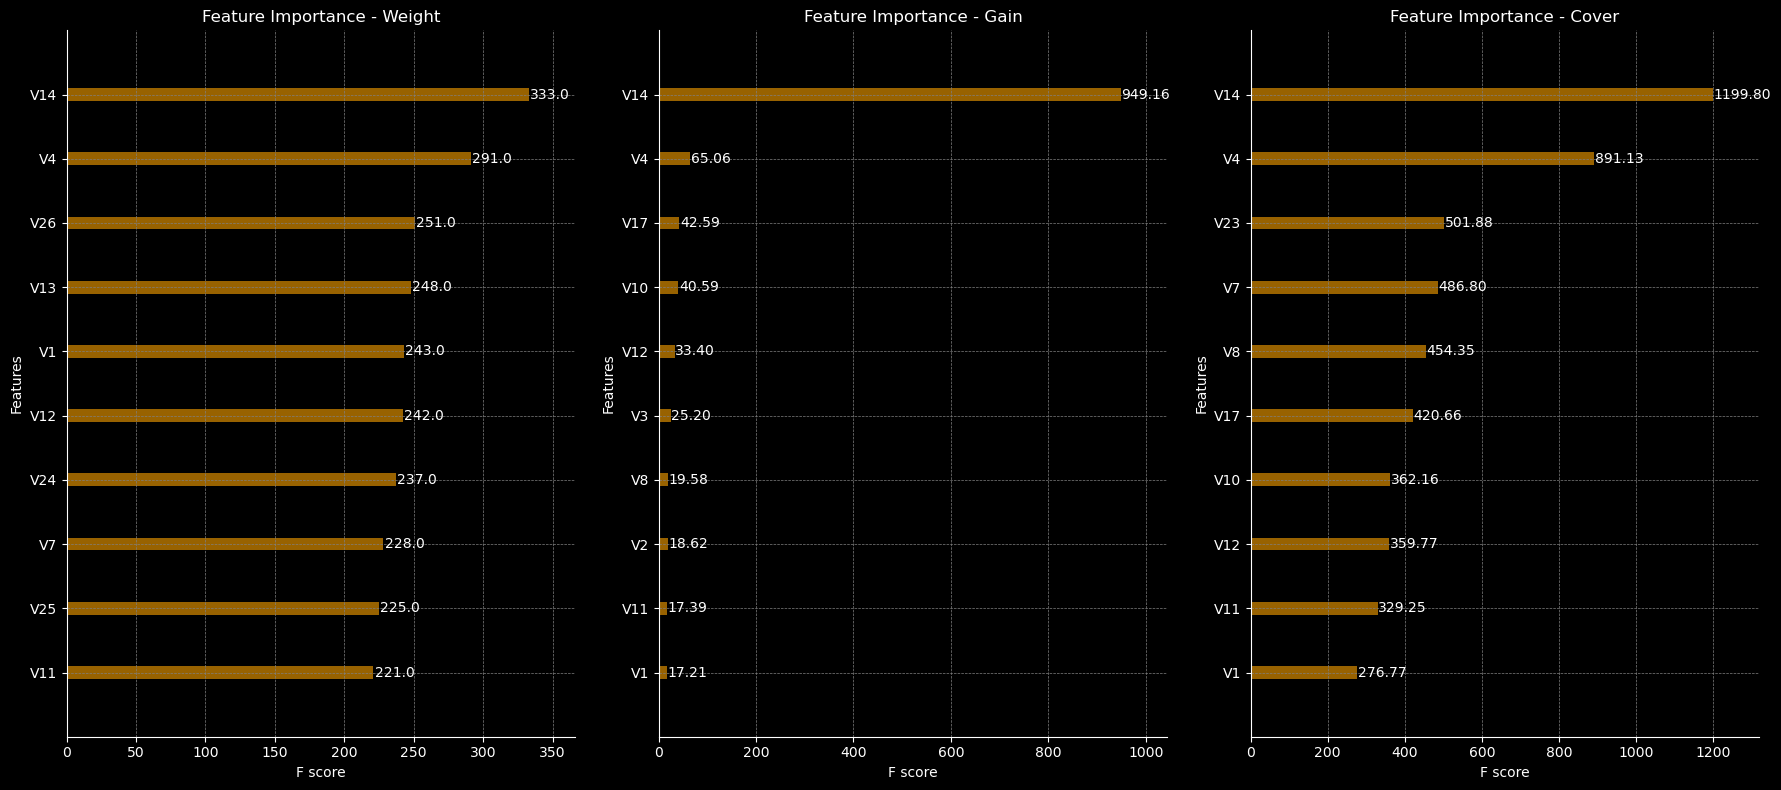

In [61]:
#Importing XGBoost's own feature-importance plotting function.
from xgboost import plot_importance

#Creating 3 axes to hold the different types of importance metric.
fig, (ax11, ax22, ax33) = plt.subplots(1,3, figsize=(18,8))

### Weight metric ####
plot_importance(xgb_final, 
                importance_type = 'weight', 
                color= 'orange',
                ax=ax11,
                alpha = 0.6,
                max_num_features = 10
               )
ax11.spines['top'].set_color('none')
ax11.spines['right'].set_color('none')
ax11.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax11.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax11.set_title('Feature Importance - Weight')

### Gain metric ###
plot_importance(xgb_final,
                importance_type = 'gain',
                color= 'orange',
                ax=ax22,
                alpha = 0.6,
                max_num_features = 10,
                values_format = "{v:.2f}"
               )
ax22.spines['top'].set_color('none')
ax22.spines['right'].set_color('none')
ax22.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax22.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax22.set_title('Feature Importance - Gain')

### Cover metric ###
plot_importance(xgb_final,
                importance_type = 'cover',
                color= 'orange',
                ax=ax33,
                alpha = 0.6,
                max_num_features = 10,
                values_format = '{v:.2f}'
               )
ax33.spines['top'].set_color('none')
ax33.spines['right'].set_color('none')
ax33.yaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax33.xaxis.grid(color='gray', linestyle='--', linewidth=0.5)
ax33.set_title('Feature Importance - Cover')


plt.tight_layout()
plt.show()

^

Some fairly interesting results. As said earlier, we'll have to use a little bit of artistic license here, given that none of these features have actual names etc... 

But what are these metrics?

- 'Weight' is the number of times a feature appeared in a tree.
- 'Gain' is the feature's contribution to the reduction of impurity.
- 'Cover' measures the relative quantity of observations affected by splits in the trees.

We can see that in all three metrics, V14 and V4 are the most important, with V14 being the clear 'winner'. V14 appears in the greatest number of trees (weight), contributes most to the reduction of impurity (gain) and covers most of the dataset when splitting the tree (cover). In a real-world environment, it would be worth our time looking further into the top-performing features to gain deeper insights into their underlying patterns and characteristics. This could involve conducting domain-specific analysis, understanding the context in which these features operate, and potentially engineering additional features that capture the nuances driving their significance in fraud detection.

# Case Study
---
Ok, so we've got some seemingly great results from our XGBoost model, but how might these actually look in the real world?

Since this dataset is synthetic, it's difficult to speculate on its application to real-world data, but for the sake of curiosity, let's apply some realistic numbers and see how our results compare. For this scenario we're going to choose one British bank, Lloyds, and compare reported fraudulent financial transactions to estimates of total daily transactions. 

The combined credit and debit card transactions in the UK in July 2022 were [2.58 billion](https://www.ukfinance.org.uk/data-and-research/data/card-spending). Although banks don't release the exact number of transactions, for this case study we'll use Lloyds' [market share](https://www.statista.com/statistics/727348/uk-banks-gross-lending-market-share/) of mortgage lending as a rough estimate of their share of transactions, which is around 16%. So, let's say that 16% of the monthly transactions were from Lloyds, which would mean 413.5 million; and divide that by 31 to get the average number of transactions per day - to get 13.34 million. 

The total amount of UK fraudulent transactions in 2022 was around [3 million](https://www.ukfinance.org.uk/policy-and-guidance/reports-and-publications/annual-fraud-report-2023#:~:text=Over%20%C2%A31.2%20billion%20was,to%20almost%20three%20million%20cases.), divide that by Lloyds' market share and we get 480,000 per year, and divide again by 365 for the daily value, we end up with 1,300. Wow, that's a lot, until looking up this information you don't realize how many cases of fraud there are in the UK, a quick Google search brings back scary results. Which is why Machine Learning techniques, like the ones applied in this report, are highly important, and valuable. 

 - So out of 13.34 million daily transactions, 1,300 cases of fraud seep through.



Extrapolating the results found by our 'winning' model up to the same scale, by multiplying our 71,000 examples by 187 to get around 13.3 million, we find that:
- 374 cases of fraud would go undetected per day. (3.5 times less)
- 2,057 false alarms would be raised per day.

Or to scale-down the Lloyds data and put it in the same scale as our validation data:
- Our model incorrectly identifies 2 cases in 71,000
- This real-world  estimate model incorrectly identifies 6 in 71,000

It seems as though our model performs better than the real bank data (around 3 times better), but I suspect that the difference between our model's performance and real-world data may be due to the limitations and assumptions in our synthetic dataset and the fact that real-world data is often more complex and variable. Not to mention that the 16% market share was an estimate, and Lloyds may actually have significantly less share, thereby closing the gap between our and their results.

In the real world, financial data is subject to various factors, including seasonality, economic conditions, and evolving fraud techniques. (Let's not forget that potential thieves could also be using ML techniques). Additionally, the accuracy of fraud detection models can be affected by the quality and quantity of data available, the sophistication of the model, and the evolving nature of fraud attempts. Our synthetic dataset, while useful for initial testing and model development, may not fully capture the intricacies of real-world financial transactions.

# Summary
---

This report set out to apply five Machine Learning techniques to a synthetic bank-like dataset in order to predict fraudulent transactions. Given that potential thieves or fraudsters now have access to the world's data at their fingertips, their potential reach is innumerable - compared to pre-internet society where most fraud couldn't be so easily and **automatically** disseminated. This potential automation calls for an automated response, in the form of a Machine Learning algorithm, or model, to quickly check the transaction first and decide whether it's fraud or not.


- During **EDA** we learned that the dataset was 50% fraud and 50% non-fraud. We found a few extreme outliers, but the synthetic nature of the data meant that many of the features were spread out regardless. We learned that the distribution of the transaction amount was completely even, which is unrealistic; and we discovered that many of the features had fairly strong correlation, which was more than likely caused by how the data was produced.
- During the **Feature Engineering** stage, we reduced the amount of fraud instances to make it more realistic, we got rid of the extreme outliers, and we split our data to 60% train, 20% test and 20% validate, keeping the 80/20 split in fraud/ non-fraud in each. 
- While applying and tuning our five **Machine Learning** models we discovered that scaling the data didn't help with the results, in fact, scaling caused the algorithms to perform significantly worse; again, likely because the data is already pseudo-scaled by the generation process. We found that many of the models took a long time to train so we used the 'pickle' module to save these results for later. The Support Vector Machines and XGBoost models performed best on our data.

The XGBoost with the basic tuning was chosen to be our final model and it performed well on the validation data with scores on all five metrics of 0.999 or higher. More tuning was done, and even more *could* be done, but with the potential of overfitting, the first XGBoost model having Grid Search Cross Validation applied to it was chosen as the best model. As well as performing excellently, it is also reasonably fast to train, making it the undisputed best choice.

When looking at estimated real-world data in the case study, our model appeared to perform roughly three times better; which given that there are teams of people working day-in day-out to try and prevent fraud tells us that real-world financial transaction data is far more complex and varied than the dataset we have here. That being said, this report at the very least provides a proof of concept and showcase of potential applications of ML.

Looking ahead, there are several avenues for further improvement. Future work should try to incorporate additional features such as customer behaviour analysis or transaction history to enhance the model's accuracy (using more realistic data). Furthermore, exploring advanced anomaly detection techniques and real-time monitoring capabilities can keep the model up to date with emerging fraud patterns, given that the environment is ever-changing.



## Conclusion 

This project utilized Machine Learning to predict fraudulent transactions. Using the basic tools available in SciKitLearn, XGBoost and related Python packages we managed to predict with a 99.92% accuracy on all of our evaluation metrics whether a card payment was fraud or not. The synthetic dataset, although faulted, provided us with a sandbox environment to try various Machine Learning techniques, leading us to select the XGBoost model. By comparing our results to estimated real-world UK data we saw that our model classified fraud with near industry standard levels of accuracy. In the future the aim would be to enhance the model by incorporating real-world data with more complex features (time data, user transaction data etc...), continuously adapting to the evolving landscape of fraud detection, and contributing to safer financial transactions.  